In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import math
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno

In [2]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
from matplotlib import rcParams

In [3]:
rcParams['figure.figsize'] = 10,10
rcParams['axes.linewidth'] = 4.0
rcParams['savefig.dpi'] = 500
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

In [4]:
%matplotlib inline
pd.set_option('display.max_columns', None)

# General Analysis

In [5]:
df = pd.read_csv('../vgsales.csv')

In [6]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
df.shape

(16598, 11)

In [10]:
drop_row_index = df[df['Year'] > 2015].index
data = df.drop(drop_row_index)

In [11]:
df[df['Year'] > 2015].index

Int64Index([  221,   271,   351,   770,   845,  1026,  1156,  1189,  1224,
             1389,
            ...
            16474, 16530, 16531, 16550, 16555, 16562, 16569, 16570, 16576,
            16589],
           dtype='int64', length=348)

In [12]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [14]:
data.describe(include=['object', 'bool'])

,Name,Platform,Genre,Publisher
count,16250,16250,16250,16194
unique,11296,31,12,566
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2162,3196,1331


# Q1: What genre games have been made the most?

In [15]:
data['Genre'].value_counts()

Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: Genre, dtype: int64

Text(0.5, 0, 'Genre')

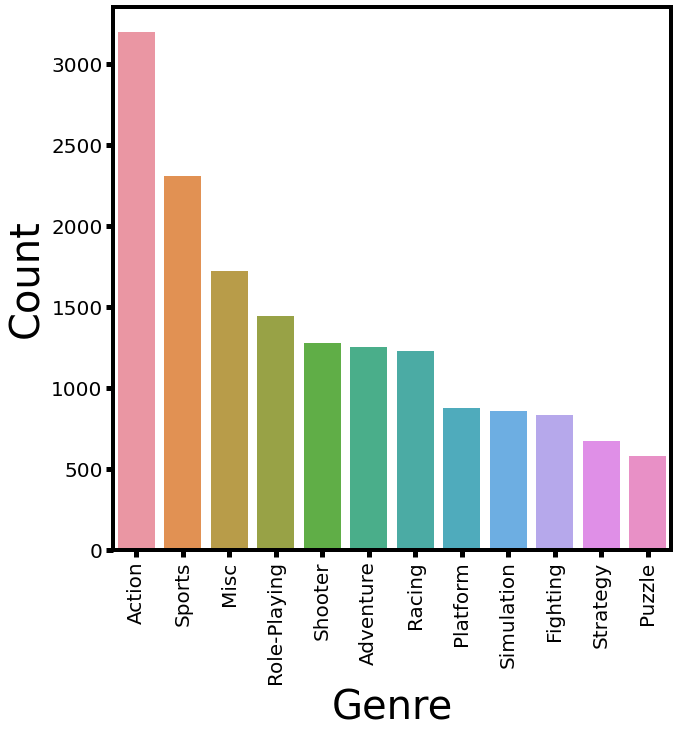

In [16]:
plt.figure(figsize=(10, 10))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.tick_params(axis='both',labelsize='20', length=7, width=5)
plt.ylabel("Count", fontsize=40)
plt.xlabel("Genre", fontsize=40)

# Q2. Which year had the most game releases?

In [17]:
data['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year, dtype: int64

Text(0.5, 0, 'Year')

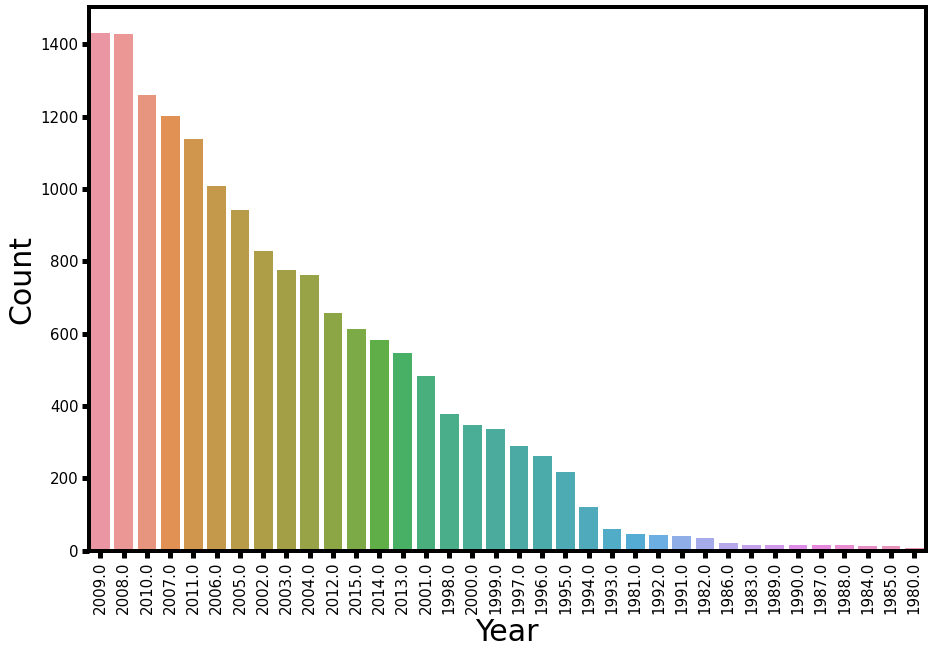

In [18]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.tick_params(axis='both',labelsize='15', length=7, width=5)
plt.ylabel("Count", fontsize=30)
plt.xlabel("Year", fontsize=30)

# Q3. Top 5 Years Games Release By Genre.

Text(0.5, 0, 'Year')

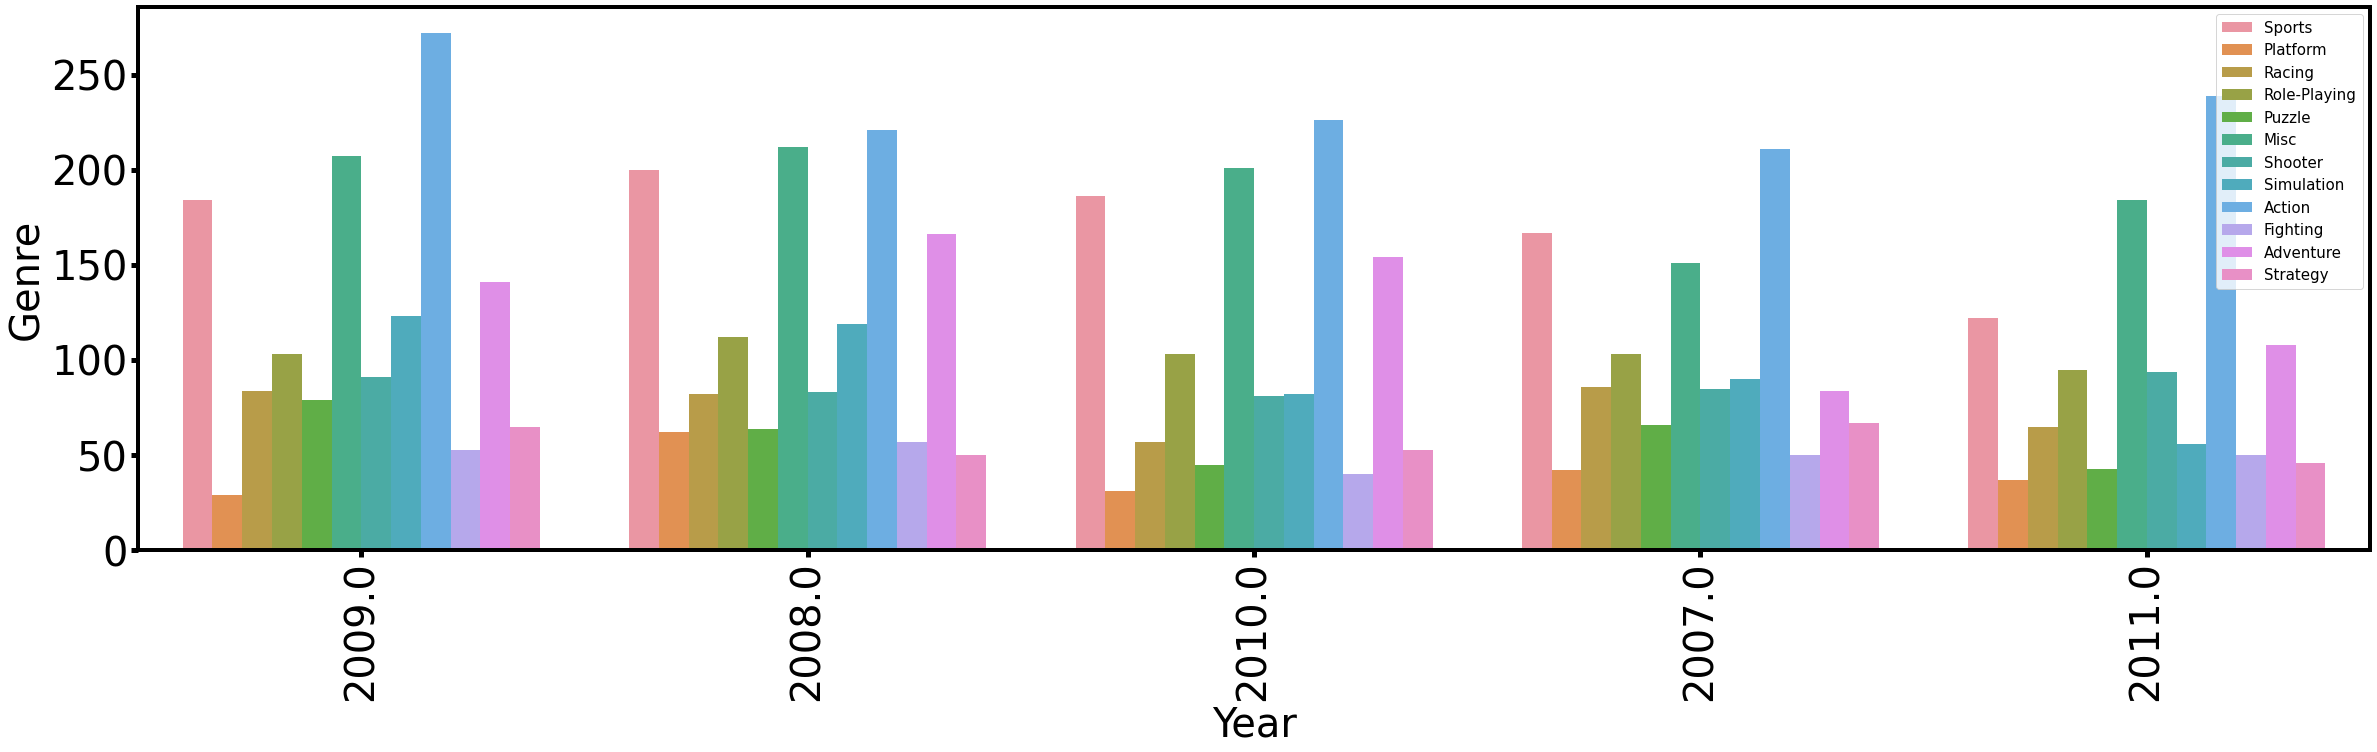

In [19]:
plt.figure(figsize=(40, 10))
sns.countplot(x="Year", data=data, hue='Genre', order=data.Year.value_counts().iloc[:5].index)
plt.legend(fontsize=15, loc="best")
plt.xticks(rotation=90)
plt.tick_params(axis='both',labelsize='40', length=7, width=5)
plt.ylabel("Genre", fontsize=40)
plt.xlabel("Year", fontsize=40)

# Q4. Which year had the highest sales worldwide?

Text(0.5, 0, 'Year')

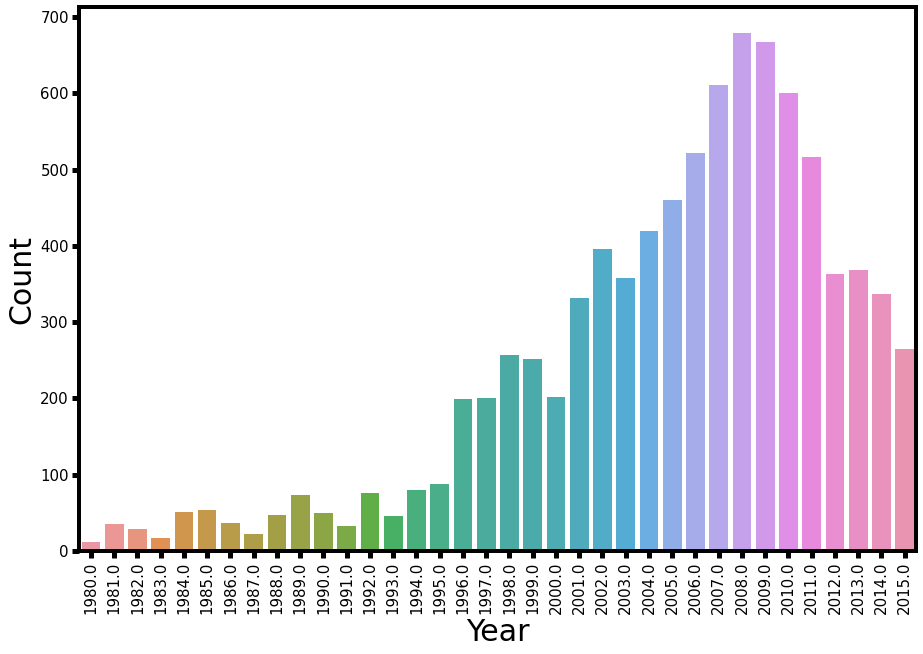

In [20]:
year_sales = data.groupby(by=['Year'])['Global_Sales'].sum().reset_index()

plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=year_sales)
plt.xticks(rotation=90)
plt.tick_params(axis='both',labelsize='15', length=7, width=5)
plt.ylabel("Count", fontsize=30)
plt.xlabel("Year", fontsize=30)

In [21]:
year_sales.sort_values('Global_Sales', ascending=False).head()

,Year,Global_Sales
28,2008.0,678.90
29,2009.0,667.30
27,2007.0,611.13
30,2010.0,600.45
26,2006.0,521.04


# Q5. Which genre game has been released the most in a single year?

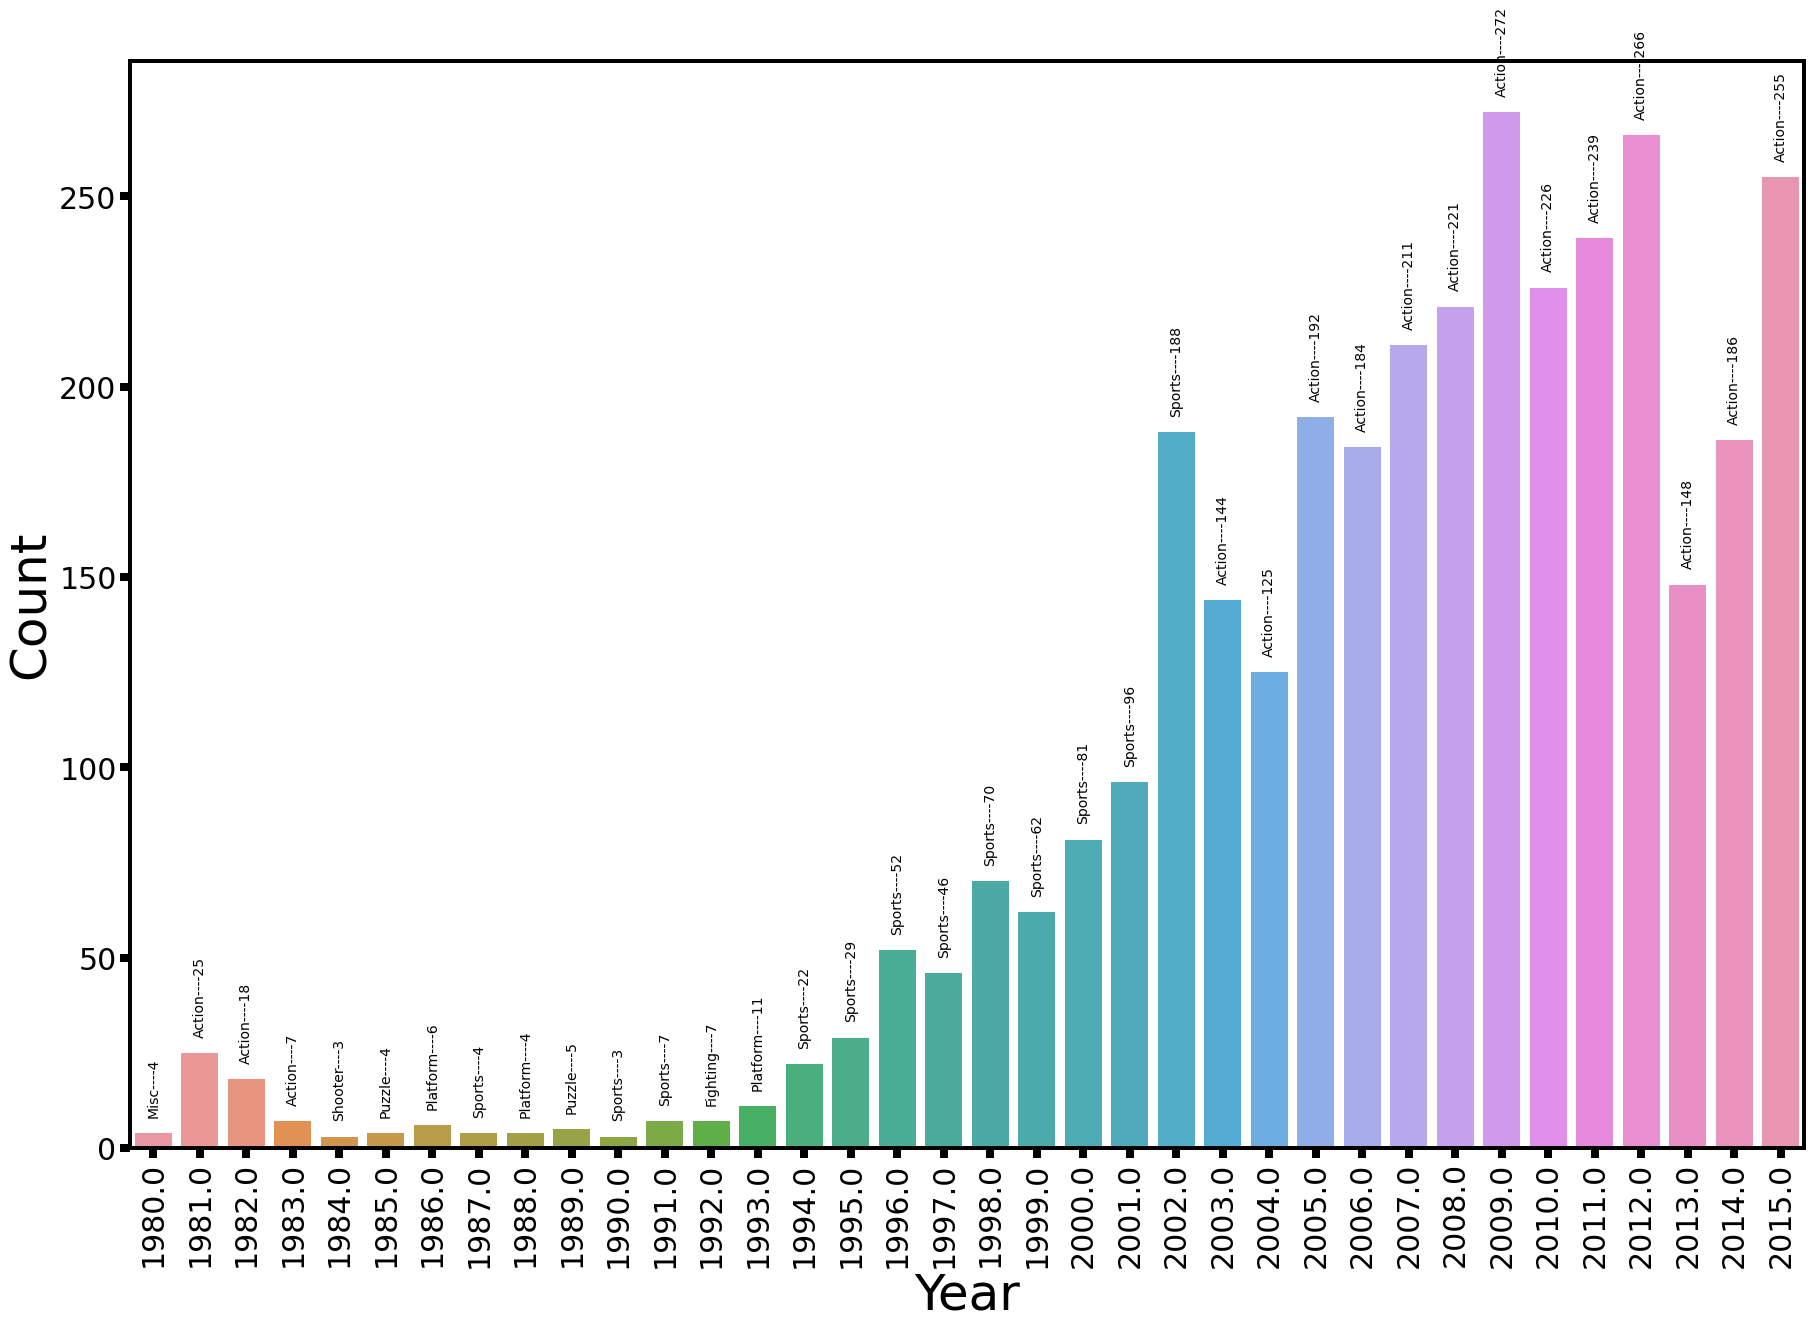

In [22]:
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)

genre = year_max_genre['Genre'].values

plt.figure(figsize=(30, 20))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.tick_params(axis='both',labelsize='30', length=10, width=8)
plt.ylabel("Count", fontsize=50)
plt.xlabel("Year", fontsize=50)
plt.show()

In [23]:
year_max_genre.sort_values('count', ascending=False).head()

,Year,Genre,count
29,2009.0,Action,272
32,2012.0,Action,266
35,2015.0,Action,255
31,2011.0,Action,239
30,2010.0,Action,226


# Q6. Which genre game has sold the most in a single year?

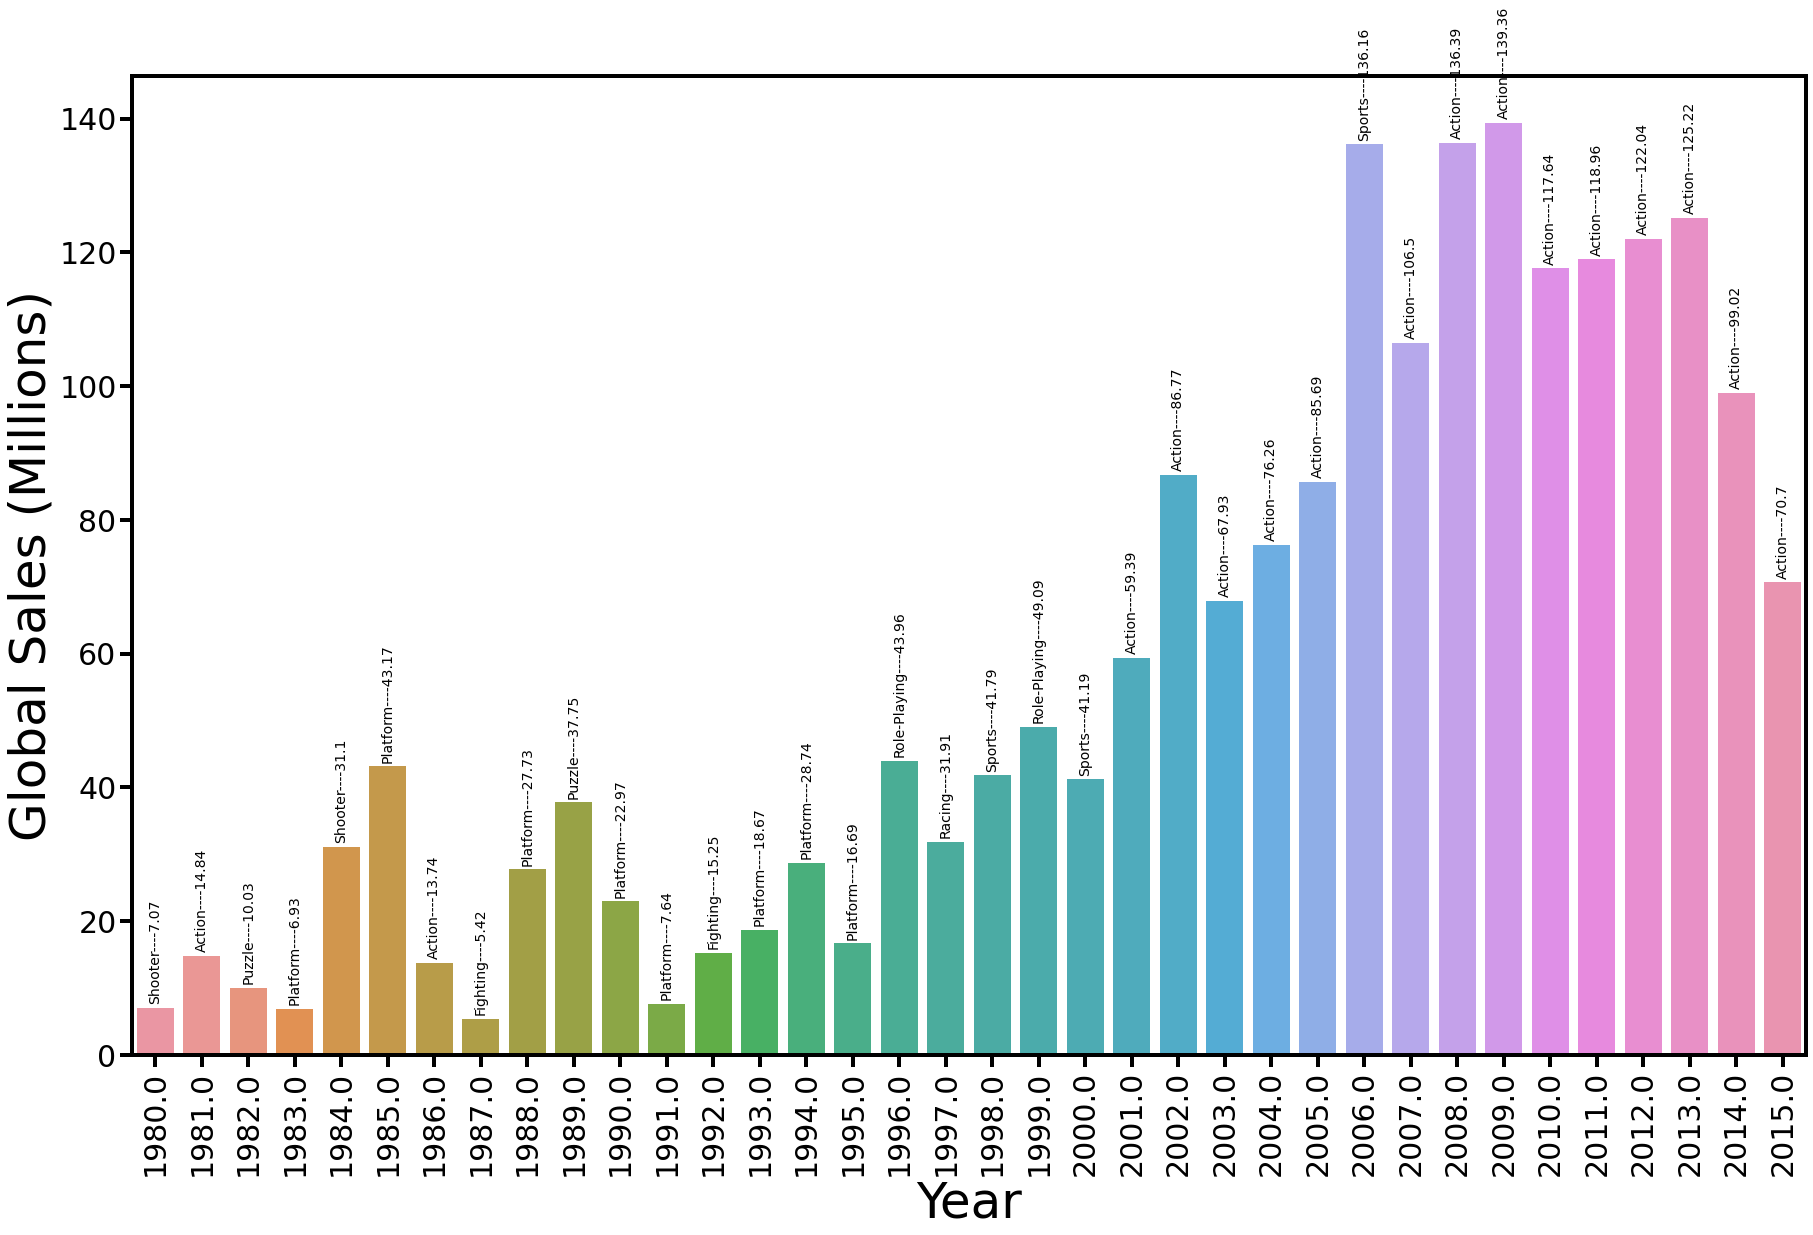

In [24]:
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

genre = year_sale_max['Genre']

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.tick_params(axis='both',labelsize='30', length=12, width=4)
plt.ylabel("Global Sales (Millions)", fontsize=50)
plt.xlabel("Year", fontsize=50)
plt.show()

In [25]:
year_sale_max.sort_values('Global_Sales', ascending=False).head()

,Year,Genre,Global_Sales
29,2009.0,Action,139.36
28,2008.0,Action,136.39
26,2006.0,Sports,136.16
33,2013.0,Action,125.22
32,2012.0,Action,122.04


# Q7. Which genre game have the highest sale price globally

Text(0.5, 0, 'Genre')

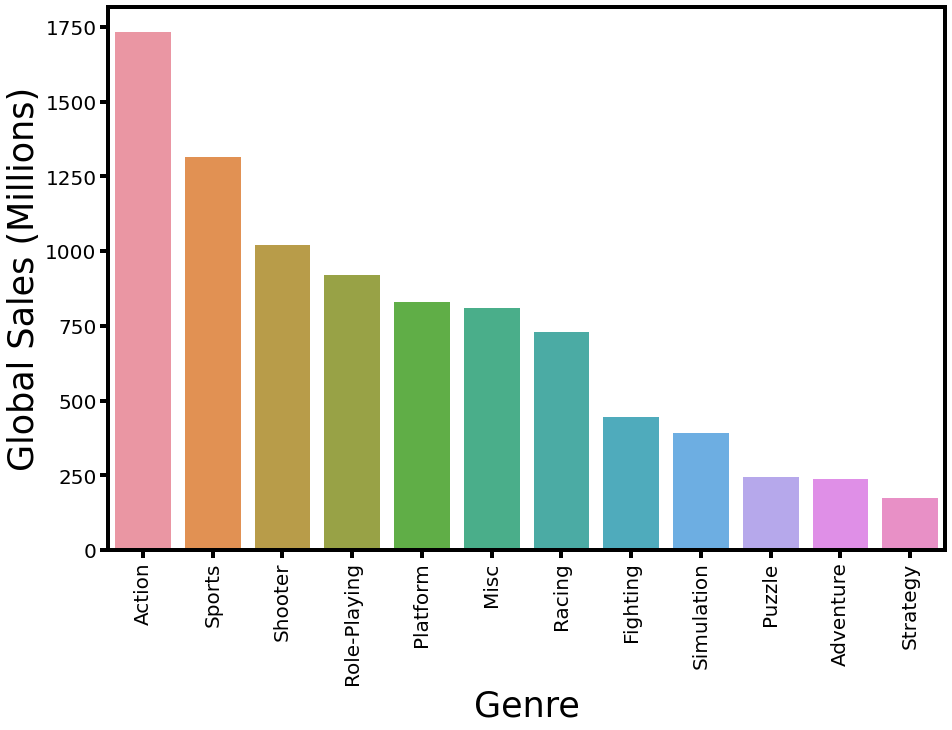

In [26]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)
plt.tick_params(axis='both',labelsize='20', length=8, width=4)
plt.ylabel("Global Sales (Millions)", fontsize=35)
plt.xlabel("Genre", fontsize=35)

# Q8. Which platfrom has the highest sale price globally?

Text(0.5, 0, 'Platform')

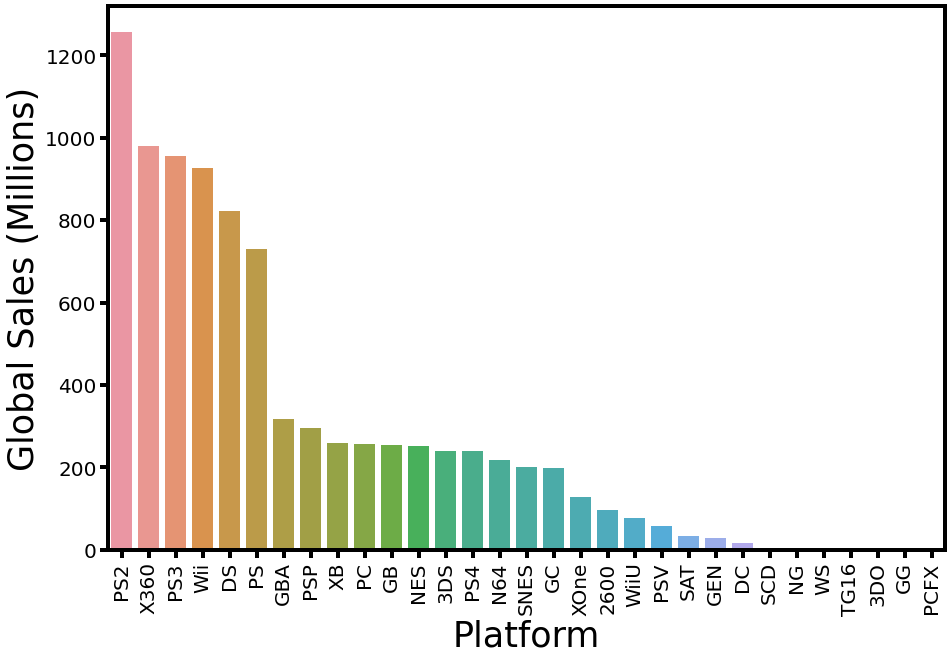

In [27]:
 data_platform1 = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform2 = data_platform1.reset_index()
data_platform3 = data_platform2.sort_values(by=['Global_Sales'], ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform3)
plt.xticks(rotation=90)
plt.tick_params(axis='both',labelsize='20', length=8, width=4)
plt.ylabel("Global Sales (Millions)", fontsize=35)
plt.xlabel("Platform", fontsize=35)

# Q9. Which individual game have the highest sale price globally?

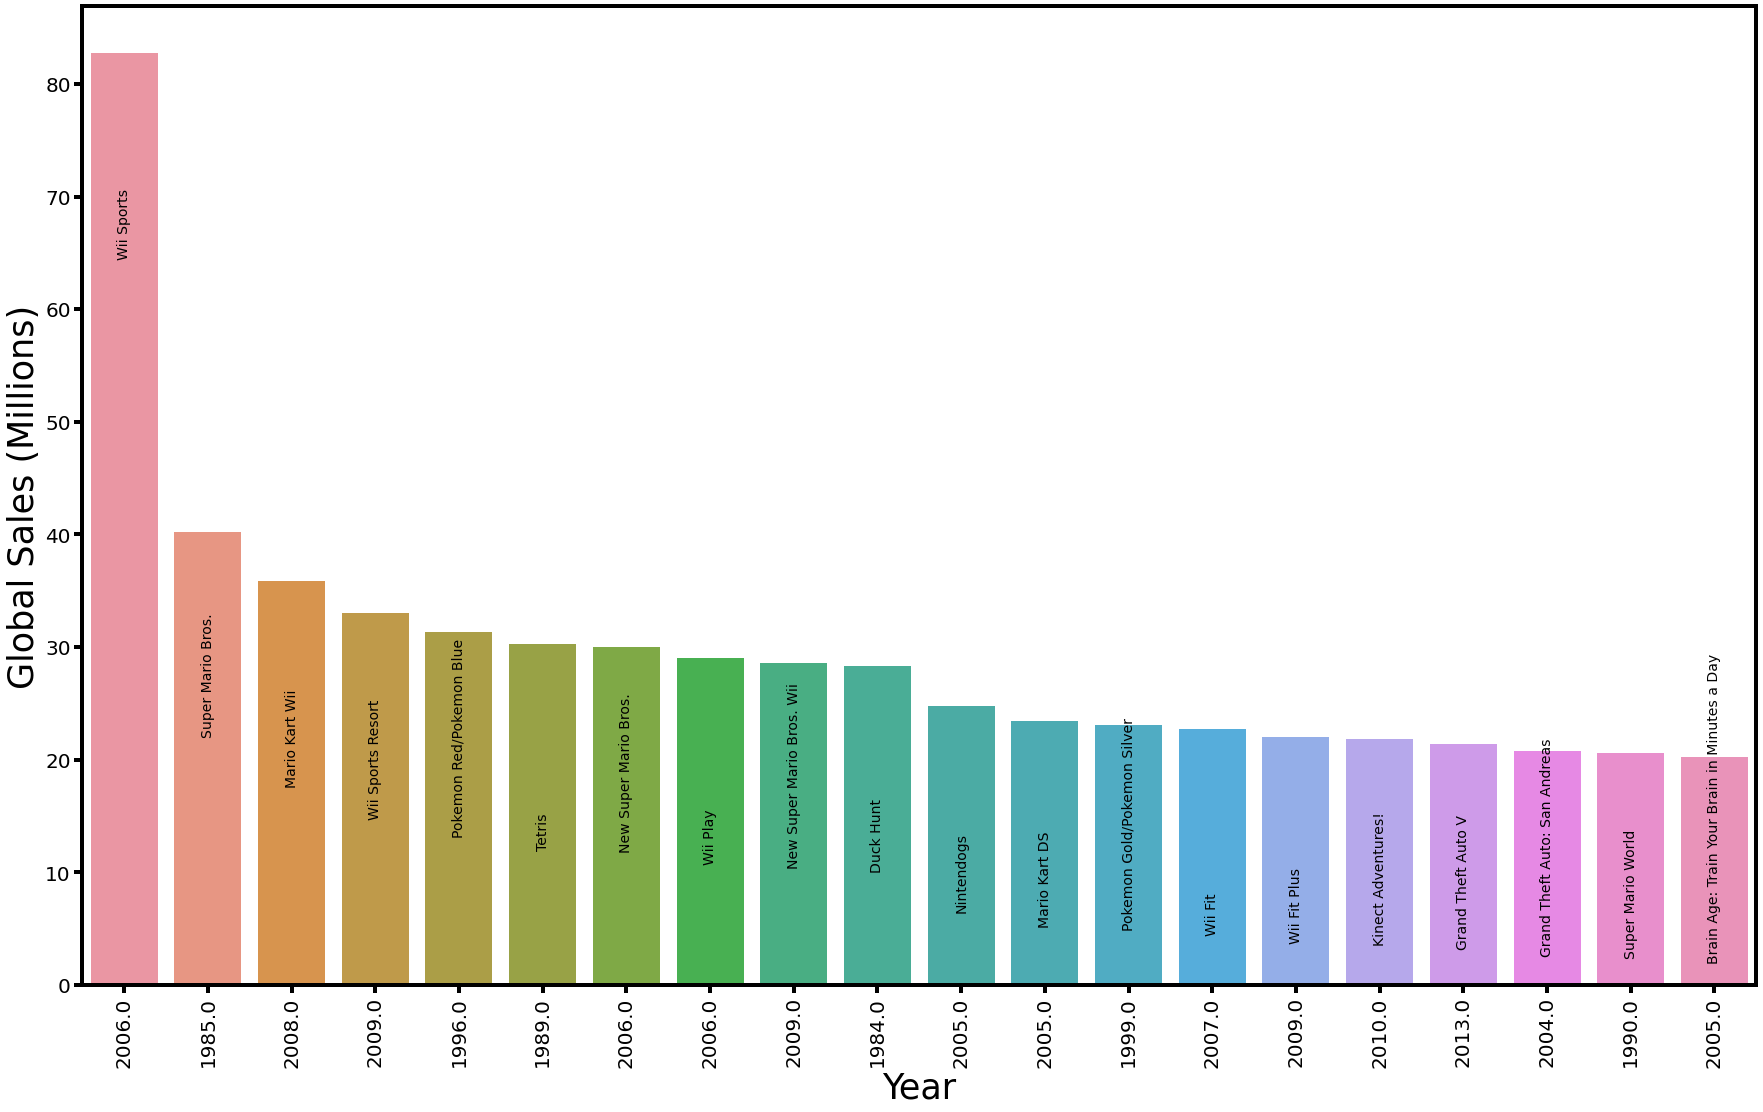

In [28]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)

name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1
plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.tick_params(axis='both',labelsize='20', length=8, width=4)
plt.ylabel("Global Sales (Millions)", fontsize=35)
plt.xlabel("Year", fontsize=35)
plt.show()

# Q10. Sales comparison by genre

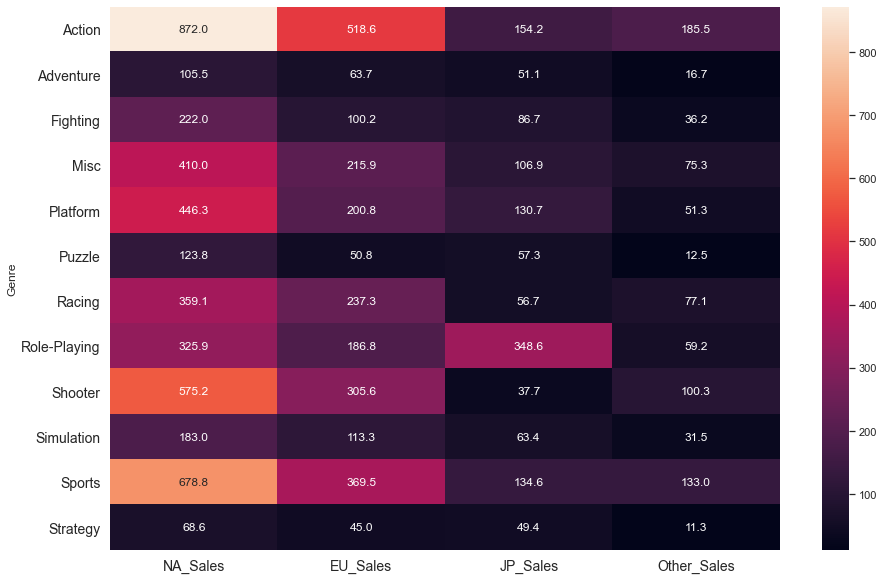

In [29]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()

plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Genre", fontsize=35)
plt.xlabel("Sales (Millions)", fontsize=35)
plt.show()

In [30]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,871.96
1,Adventure,NA_Sales,105.46
2,Fighting,NA_Sales,221.99
3,Misc,NA_Sales,410.02
4,Platform,NA_Sales,446.26


Text(0.5, 0, 'Genre')

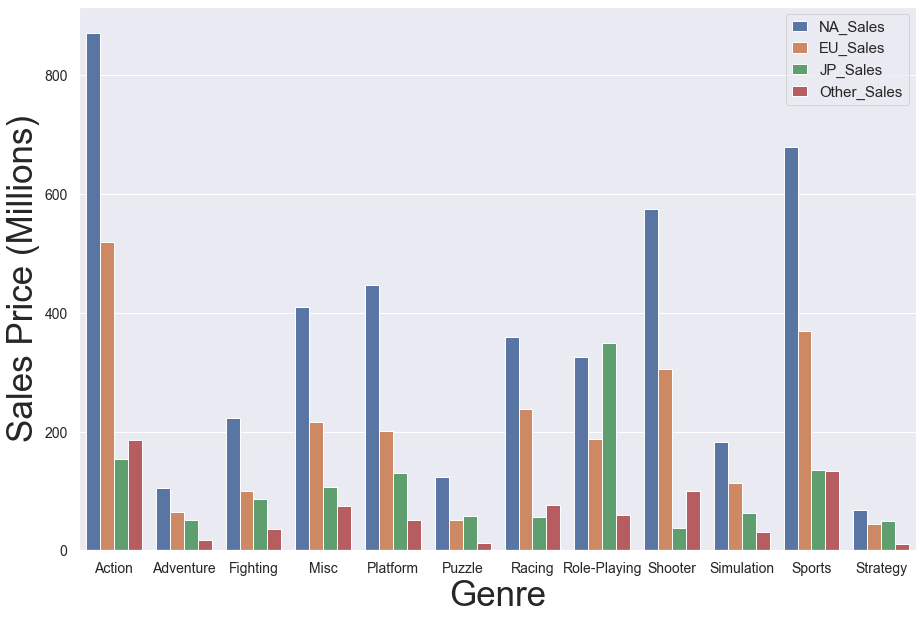

In [31]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.tick_params(axis='both',labelsize='14', length=8, width=4)
plt.legend(fontsize=15,handlelength=1,loc="best")
plt.ylabel("Sales Price (Millions)", fontsize=35)
plt.xlabel("Genre", fontsize=35)

# Q11. Sales compearison by platform

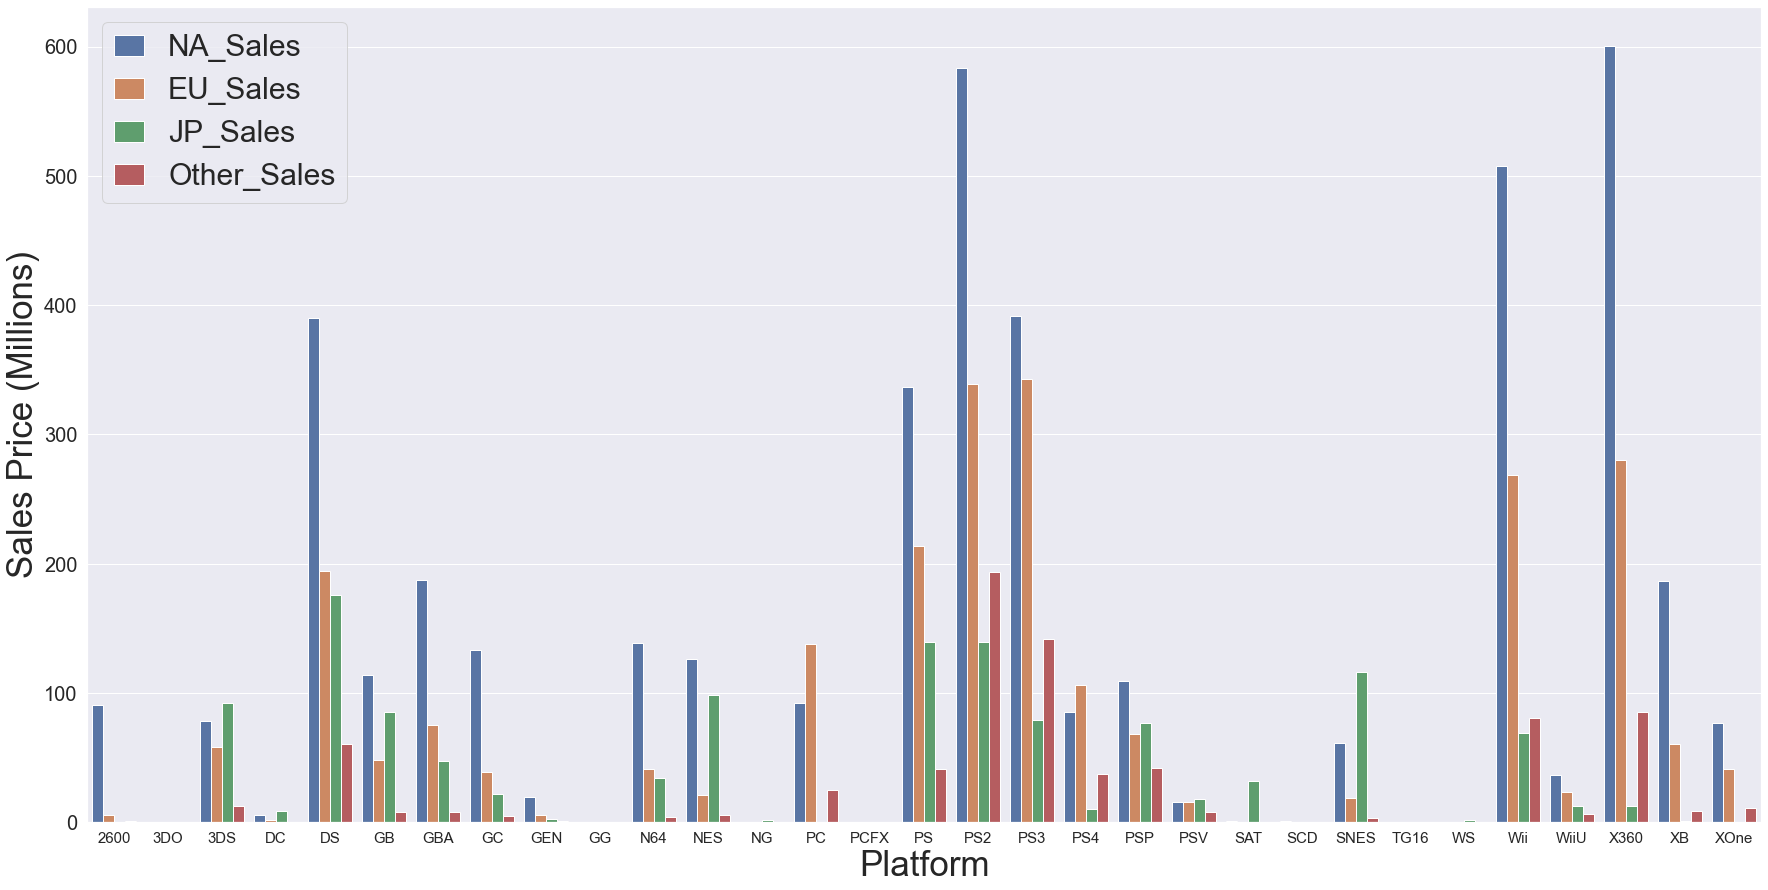

In [36]:
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
org_by_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()
comp_table = pd.melt(org_by_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')

plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.legend(fontsize=30,handlelength=1,loc="best")
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.ylabel("Sales Price (Millions)", fontsize=35)
plt.xlabel("Platform", fontsize=35)
plt.show()

# Q12. Top 20 Publishers

Text(0.5, 0, 'Publisher')

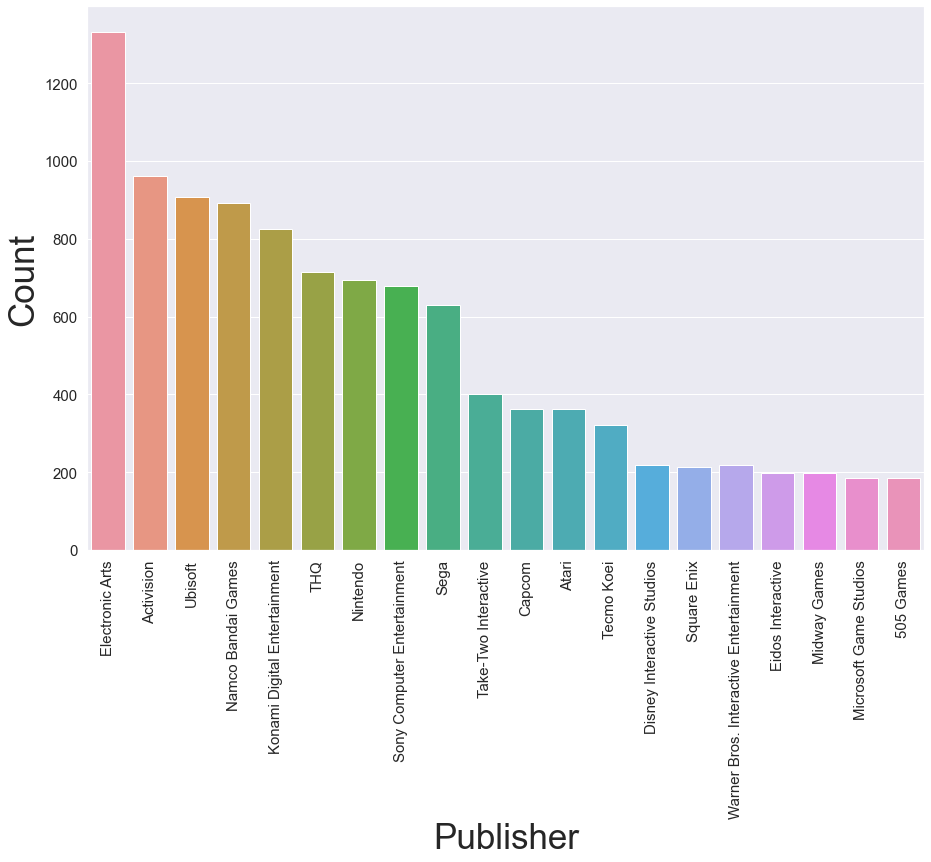

In [38]:
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)
plt.tick_params(axis='both',labelsize='15')
plt.ylabel("Count", fontsize=35)
plt.xlabel("Publisher", fontsize=35)

# Q13. Top 20 Global Sales By Publisher

Text(0.5, 0, 'Publisher')

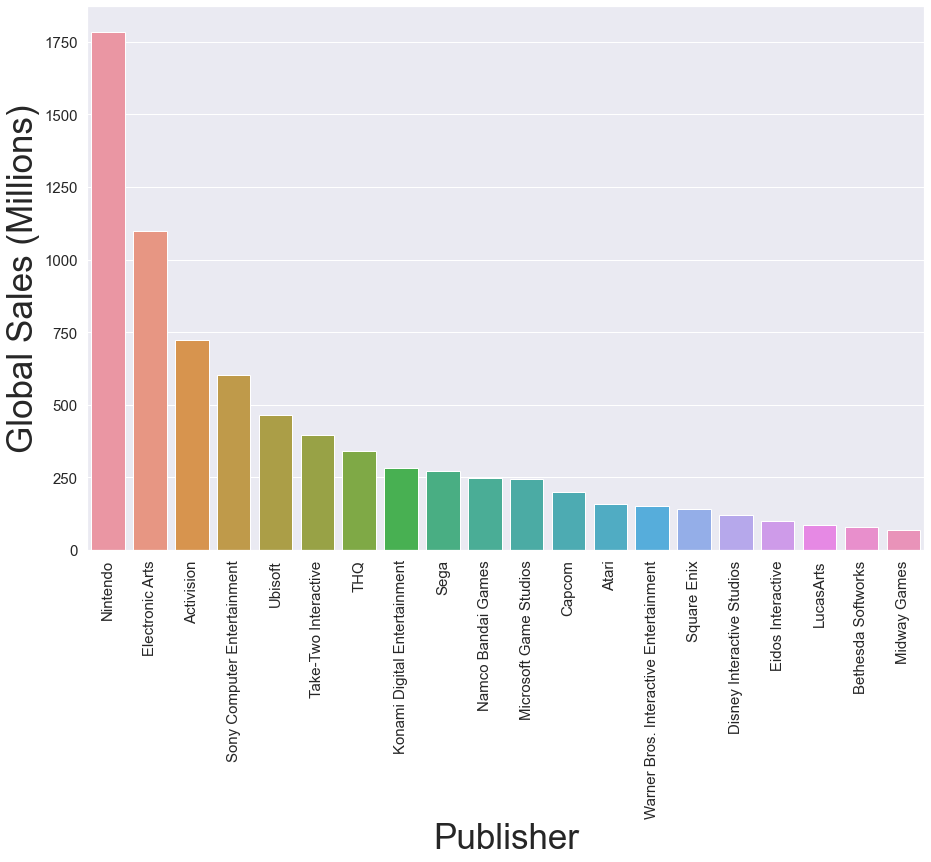

In [39]:
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)
plt.tick_params(axis='both',labelsize='15')
plt.ylabel("Global Sales (Millions)", fontsize=35)
plt.xlabel("Publisher", fontsize=35)

# Q14. Top 20 Publisher Comparison

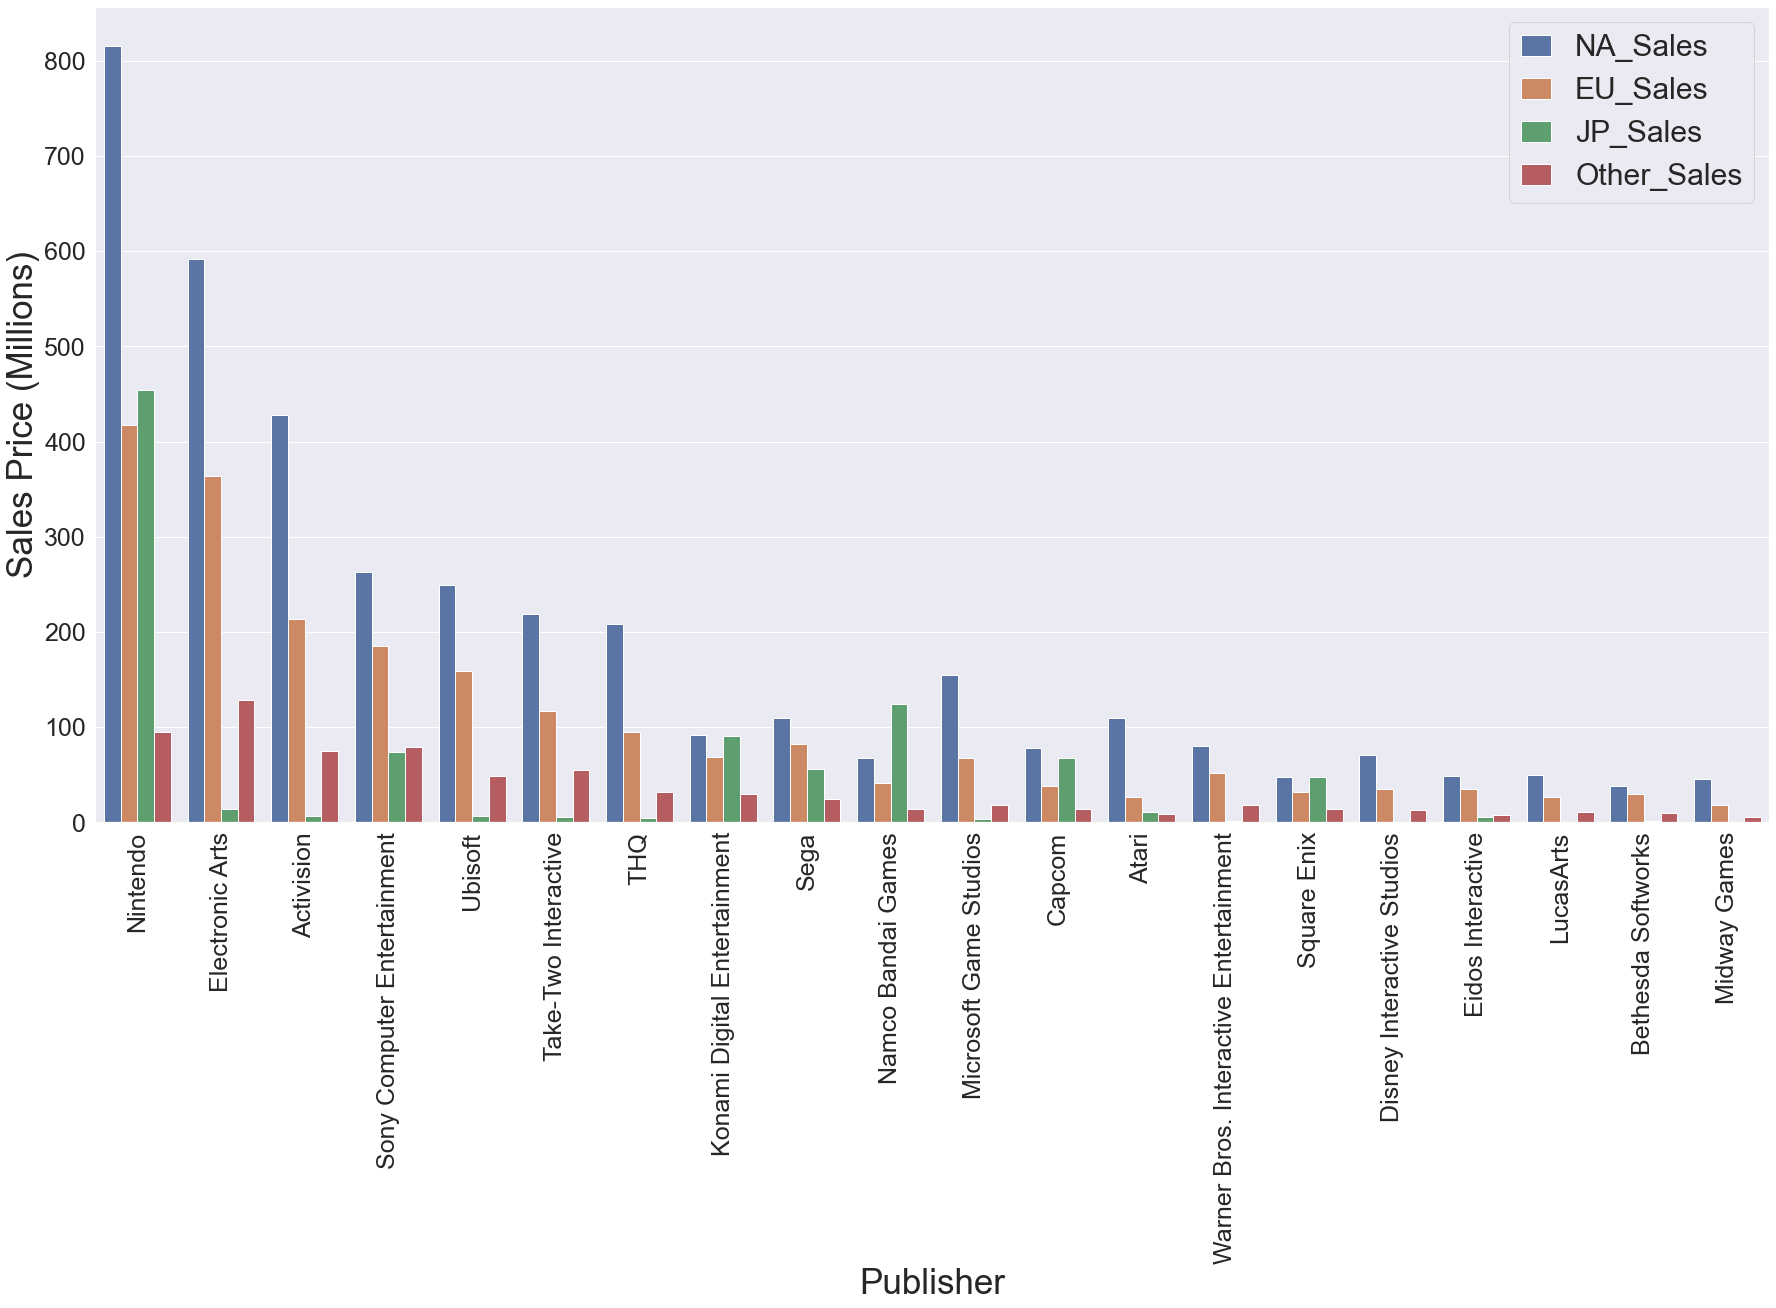

In [43]:
comp_publisher1 = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher2 = comp_publisher1.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher20 = comp_publisher2.head(20)
comp_publisher_order = pd.melt(comp_publisher20, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')

plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher_order)
plt.legend(fontsize=30,handlelength=1,loc="best")
plt.xticks(rotation=90)
plt.tick_params(axis='both',labelsize='25')
plt.ylabel("Sales Price (Millions)", fontsize=35)
plt.xlabel("Publisher", fontsize=35)
plt.show()